In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [4]:
path = "./data/shapefiles/tl_2020_37_tabblock20.shp"

In [6]:
df = gpd.read_file(path)
df.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,HOUSING20,POP20,geometry
0,37,085,070904,1016,370850709041016,Block 1016,G5040,R,None,None,S,223704,0,+35.5203352,-078.7429098,135,236,"POLYGON ((-78.74612 35.51781, -78.74593 35.517..."
1,37,105,030300,2040,371050303002040,Block 2040,G5040,U,78877,U,S,8225,0,+35.4689037,-079.1609933,0,0,"POLYGON ((-79.16192 35.46852, -79.16154 35.469..."
2,37,085,070200,3007,370850702003007,Block 3007,G5040,U,25039,U,S,13928,0,+35.3100898,-078.6080862,6,14,"POLYGON ((-78.60900 35.30999, -78.60828 35.310..."
3,37,085,070500,3022,370850705003022,Block 3022,G5040,U,25039,U,S,142908,0,+35.3189133,-078.6570878,26,45,"POLYGON ((-78.65879 35.31721, -78.65876 35.317..."
4,37,085,070401,1041,370850704011041,Block 1041,G5040,U,25039,U,S,20698,0,+35.3546270,-078.6628098,16,46,"POLYGON ((-78.66407 35.35466, -78.66371 35.355..."


In [7]:
census_df = pd.read_csv("./data/nc/DECENNIALPL2020.P1-Data-block.csv")

c:\ProgramData\Anaconda3\envs\gerrymandering\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
census_df = census_df[census_df["NAME"].str.contains("Census Tract")]
census_df = census_df[["GEO_ID", "NAME", "P1_001N", "P1_003N"]] # P1_001N = Total Population, P1_003N = White alone
census_df["P1_001N"] = census_df["P1_001N"].astype(int)
census_df["P1_003N"] = census_df["P1_003N"].astype(int)
census_df = census_df[census_df["P1_001N"] > 0]
census_df["white_prop"] = census_df["P1_003N"] / census_df["P1_001N"]
census_df.head()

,GEO_ID,NAME,P1_001N,P1_003N,white_prop
2,1000000US370010201001001,"Block 1001, Block Group 1, Census Tract 201, A...",34,28,0.823529
3,1000000US370010201001002,"Block 1002, Block Group 1, Census Tract 201, A...",30,14,0.466667
4,1000000US370010201001003,"Block 1003, Block Group 1, Census Tract 201, A...",34,22,0.647059
5,1000000US370010201001004,"Block 1004, Block Group 1, Census Tract 201, A...",60,38,0.633333
6,1000000US370010201001005,"Block 1005, Block Group 1, Census Tract 201, A...",30,17,0.566667


In [11]:
census_df["GEOID"] = census_df["GEO_ID"].str[9:] # Remove the first 9 characters of the GEO_ID column to match map data

In [13]:
census_df.head()

,GEO_ID,NAME,P1_001N,P1_003N,white_prop,GEOID
2,1000000US370010201001001,"Block 1001, Block Group 1, Census Tract 201, A...",34,28,0.823529,370010201001001
3,1000000US370010201001002,"Block 1002, Block Group 1, Census Tract 201, A...",30,14,0.466667,370010201001002
4,1000000US370010201001003,"Block 1003, Block Group 1, Census Tract 201, A...",34,22,0.647059,370010201001003
5,1000000US370010201001004,"Block 1004, Block Group 1, Census Tract 201, A...",60,38,0.633333,370010201001004
6,1000000US370010201001005,"Block 1005, Block Group 1, Census Tract 201, A...",30,17,0.566667,370010201001005


In [14]:
race_map = df.merge(census_df, left_on="GEOID20", right_on="GEOID", validate="one_to_one")

In [15]:
race_map.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,INTPTLON20,HOUSING20,POP20,geometry,GEO_ID,NAME,P1_001N,P1_003N,white_prop,GEOID
0,37,085,070904,1016,370850709041016,Block 1016,G5040,R,None,None,...,-078.7429098,135,236,"POLYGON ((-78.74612 35.51781, -78.74593 35.517...",1000000US370850709041016,"Block 1016, Block Group 1, Census Tract 709.04...",236,67,0.283898,370850709041016
1,37,085,070200,3007,370850702003007,Block 3007,G5040,U,25039,U,...,-078.6080862,6,14,"POLYGON ((-78.60900 35.30999, -78.60828 35.310...",1000000US370850702003007,"Block 3007, Block Group 3, Census Tract 702, H...",14,0,0.000000,370850702003007
2,37,085,070500,3022,370850705003022,Block 3022,G5040,U,25039,U,...,-078.6570878,26,45,"POLYGON ((-78.65879 35.31721, -78.65876 35.317...",1000000US370850705003022,"Block 3022, Block Group 3, Census Tract 705, H...",45,26,0.577778,370850705003022
3,37,085,070401,1041,370850704011041,Block 1041,G5040,U,25039,U,...,-078.6628098,16,46,"POLYGON ((-78.66407 35.35466, -78.66371 35.355...",1000000US370850704011041,"Block 1041, Block Group 1, Census Tract 704.01...",46,9,0.195652,370850704011041
4,37,161,960800,1014,371619608001014,Block 1014,G5040,U,30331,U,...,-081.8911382,32,70,"POLYGON ((-81.89831 35.33971, -81.89827 35.339...",1000000US371619608001014,"Block 1014, Block Group 1, Census Tract 9608, ...",70,13,0.185714,371619608001014


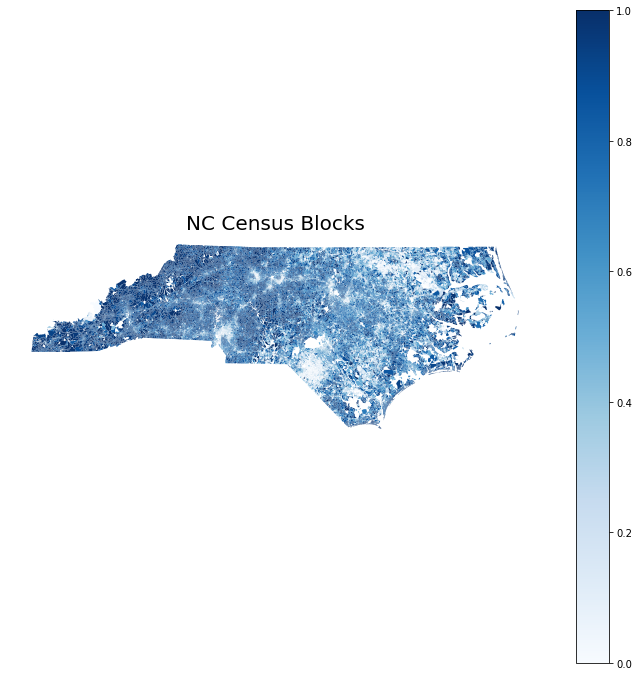

In [18]:
fig, ax = plt.subplots(figsize=(12,12))
race_map.plot(ax=ax, column='white_prop', cmap='Blues', legend=True)
ax.set_title('NC Census Blocks', fontsize=20)
ax.axis('off')
plt.savefig('images/nc-block.png')